In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (a).

In [2]:
np.random.seed(0)

n = 50
p = 6

A = np.random.randn(n, p)
y = np.random.randn(n)

ATA = A.T @ A
ATy = A.T @ y
x_f = np.linalg.inv(ATA) @ ATy

print("Coefficient vector x:")
print(x_f)

Coefficient vector x:
[-0.18550473 -0.04766294  0.01806248 -0.11021123  0.21901124  0.09739943]


## (b).

In [3]:
Hessian = (1/n) * (A.T @ A)
eigenvalues = np.linalg.eigvals(Hessian)
L = np.max(eigenvalues)
mu = np.min(eigenvalues)
kappa = L / mu

print("Hessian matrix:")
print(Hessian)
print("\nEigenvalues of the Hessian:")
print(eigenvalues)
print("\nLipschitz constant of the gradient (L):", L)
print("Strong convexity modulus (mu):", mu)
print("Condition number (kappa = L/mu):", kappa)

Hessian matrix:
[[ 1.18002424 -0.06595123  0.18577832  0.13099896  0.1607618   0.0975328 ]
 [-0.06595123  1.15330076  0.02401391  0.07569614 -0.07207829  0.06681125]
 [ 0.18577832  0.02401391  1.07566777 -0.03900441 -0.05116763  0.15285224]
 [ 0.13099896  0.07569614 -0.03900441  0.9456766  -0.06240598  0.01234956]
 [ 0.1607618  -0.07207829 -0.05116763 -0.06240598  0.79803086 -0.09435599]
 [ 0.0975328   0.06681125  0.15285224  0.01234956 -0.09435599  0.86026574]]

Eigenvalues of the Hessian:
[1.39733064 0.62603264 1.24008482 1.06969207 0.77273158 0.90709422]

Lipschitz constant of the gradient (L): 1.397330638076192
Strong convexity modulus (mu): 0.6260326443221202
Condition number (kappa = L/mu): 2.2320411734906376


## (c).

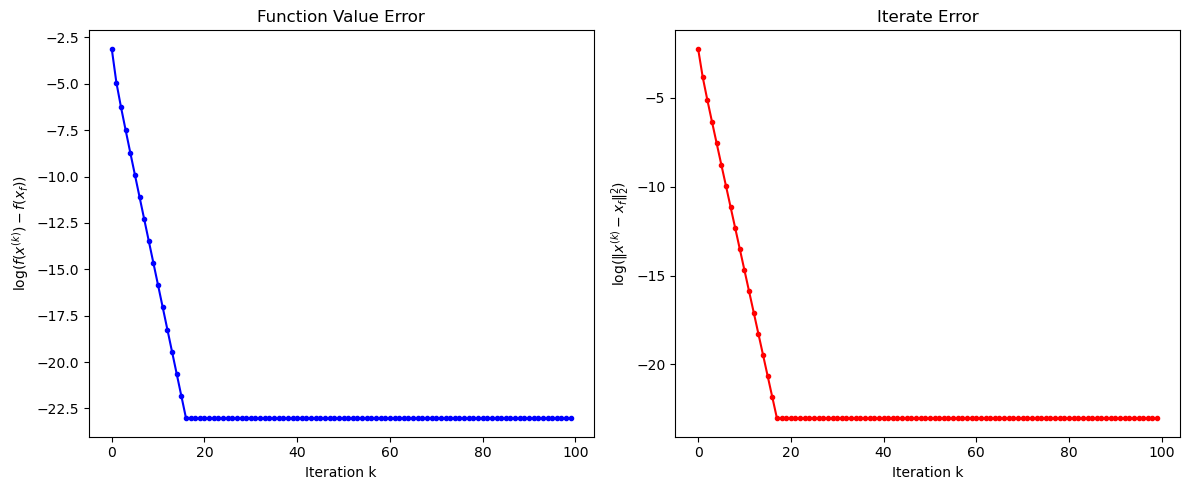

In [4]:
def f(x):
    return 0.5/n * np.linalg.norm(y - A @ x)**2

def grad_f(x):
    return 1/n * (A.T @ (A @ x - y))

f_opt = f(x_f)
alpha = 1 / L

n_iters = 100
x = np.zeros(p)  # initial guess
f_errors = []
x_errors = []

for k in range(n_iters):
    current_f_error = np.abs(f(x) - f_opt)
    current_x_error = np.linalg.norm(x - x_f)**2
    f_errors.append(current_f_error)
    x_errors.append(current_x_error)

    x = x - alpha * grad_f(x)

plt.figure(figsize=(12, 5))
epsilon = 1e-10  # small constant to avoid log(0)

plt.subplot(1, 2, 1)
plt.plot(np.log(np.maximum(f_errors, epsilon)), 'b-o', markersize=3)
plt.xlabel('Iteration k')
plt.ylabel(r'$\log(f(x^{(k)})-f(x_f))$')
plt.title('Function Value Error')

plt.subplot(1, 2, 2)
plt.plot(np.log(np.maximum(x_errors, epsilon)), 'r-o',  markersize=3)
plt.xlabel('Iteration k')
plt.ylabel(r'$\log(\|x^{(k)}-x_f\|_2^2)$')
plt.title('Iterate Error')

plt.tight_layout()
plt.show()

For a strongly convex quadratic problem, gradient descent with a step size $\alpha = 1/L$ converges geometrically, so the log of error is linear in the number of iterations. These plot agrees with the theoretical findings.

## (d)

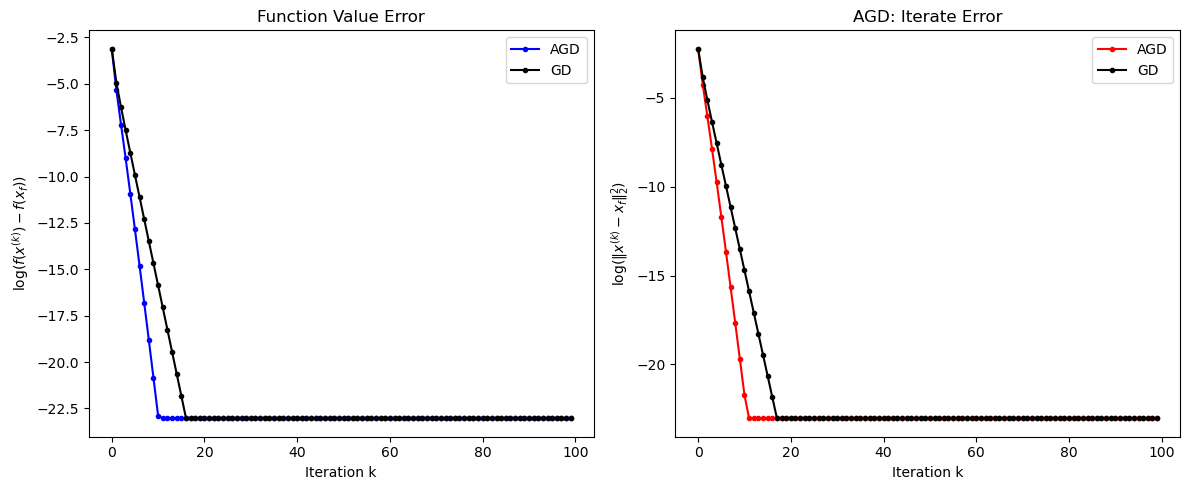

In [5]:
alpha = 1 / L

theta = np.sqrt(kappa) 
beta = (theta-1) / (theta+1)

x = np.zeros(p) 
y_agd = np.copy(x)

f_errors_agd = []
x_errors_agd = []

# Run Nesterov's Accelerated Gradient Descent iterations
for k in range(n_iters):
    current_f_error = np.abs(f(y_agd) - f_opt)
    current_x_error = np.linalg.norm(y_agd - x_f)**2
    f_errors_agd.append(current_f_error)
    x_errors_agd.append(current_x_error)
    
    # AGD update
    x_next = y_agd - alpha * grad_f(y_agd)
    y_next = x_next + beta * (x_next - x)
    
    x = x_next
    y_agd = y_next

epsilon = 1e-10
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.log(np.maximum(f_errors_agd, epsilon)), 'b-o', markersize=3, label='AGD')
plt.plot(np.log(np.maximum(f_errors, epsilon)), 'k-o', markersize=3, label='GD')
plt.xlabel('Iteration k')
plt.ylabel(r'$\log(f(x^{(k)})-f(x_f))$')
plt.title('Function Value Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.log(np.maximum(x_errors_agd, epsilon)), 'r-o', markersize=3, label='AGD')
plt.plot(np.log(np.maximum(x_errors, epsilon)), 'k-o', markersize=3, label='GD')
plt.xlabel('Iteration k')
plt.ylabel(r'$\log(\|x^{(k)}-x_f\|_2^2)$')
plt.title('AGD: Iterate Error')
plt.legend()

plt.tight_layout()
plt.show()

We observe that Nestorovs' AGD converges faster than the standard gradient descent.

## (e).

In [6]:
np.random.seed(2)

n = 50
p = 55
A = np.random.randn(n, p)
y = np.random.randn(n)

def f(x):
    return 0.5/n * np.linalg.norm(y - A @ x)**2

def grad_f(x):
    return 1/n * (A.T @ (A @ x - y))

# (a) Compute an norm-minimizing optimal solution using the pseudo-inverse
x_f = np.linalg.pinv(A) @ y
f_opt = f(x_f)

# (b) Compute the Hessian matrix: H = (1/n) A^T A,and estimate the Lipschitz constant L as the largest eigenvalue.
H = (1/n) * (A.T @ A)
singular_vals = np.linalg.svd(H, compute_uv=False)
L = np.max(singular_vals)
print("Estimated Lipschitz constant L =", L)

Estimated Lipschitz constant L = 3.778605356976933


In [7]:
alpha = 1 / L

n_iters = 2000
x = np.zeros(p)  # initial guess
f_errors = []

for k in range(n_iters):
    current_f_error = np.abs(f(x) - f_opt)
    f_errors.append(current_f_error)
    x = x - alpha * grad_f(x)

In [8]:
x = np.zeros(p)
x_prev = np.copy(x)
lambda_k = 0
beta_k = 0
f_errors_agd = []

for k in range(n_iters):
    current_f_error = np.abs(f(x) - f_opt)
    f_errors_agd.append(current_f_error)

    # Compute y_k
    y_k = x + beta_k * (x - x_prev)

    # AGD update step
    x_next = y_k - alpha * grad_f(y_k)

    # Update lambda and beta
    lambda_next = (1 + np.sqrt(1 + 4 * lambda_k**2)) / 2
    beta_next = (lambda_k - 1) / lambda_next

    # Update iterates
    x_prev = x
    x = x_next
    lambda_k = lambda_next
    beta_k = beta_next

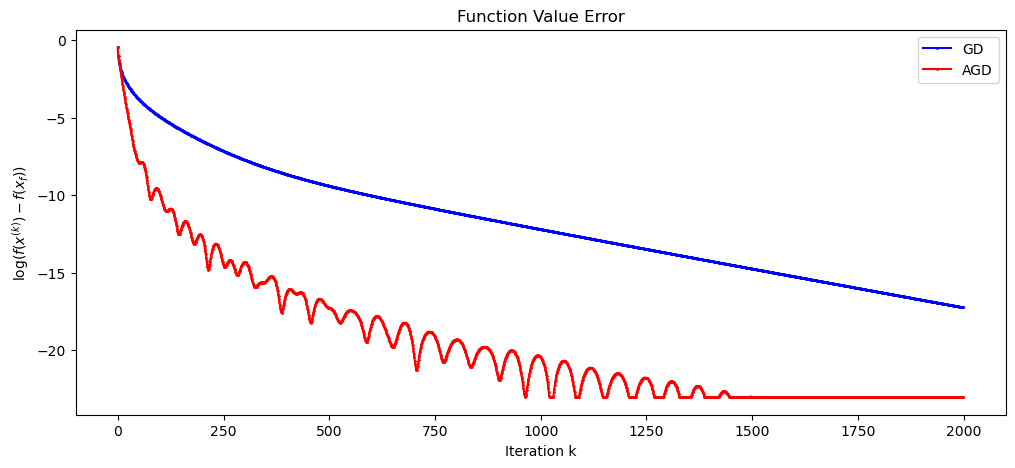

In [9]:
plt.figure(figsize=(12, 5))
epsilon = 1e-10 
plt.plot(np.log(np.maximum(f_errors, epsilon)), 'b-o', markersize=1, label = 'GD')
plt.plot(np.log(np.maximum(f_errors_agd, epsilon)), 'r-o', markersize=1, label='AGD')
plt.xlabel('Iteration k')
plt.ylabel(r'$\log(f(x^{(k)})-f(x_f))$')
plt.title('Function Value Error')
plt.legend()

The theoretical convergence rate of the log of errors is now of order log(k) and log(k^2)=2log(k), which agrees with the plot above. We observe some oscillations of AGD, but it converges much faster than the standard gradient descent.